In [ ]:
%pip install scipy
%pip install pandas
%pip install matplotlib

In [ ]:
%pip install tabulate2

In [ ]:
%pip install seaborn

In [ ]:
%pip install openpyxl

In [ ]:
%pip install plotly

In [345]:
# Import libraries for the assignment
from scipy import stats
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tabulate import tabulate

# Question 1

In [396]:
# A list of energy levels in kJ, for 11 women
energy_intake = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
# Calculating the sample mean
sample_mean = np.mean(energy_intake)
print(f"Sample Mean: {sample_mean}")
# Calculating the standard deviation
sample_sd = np.std(energy_intake)
print(f"Sample Standard Deviation: {sample_sd}")
# Population mean is the provided value, 7725
population_mean = 7725.0
# The size of the sample
n = len(energy_intake)
# Calculating the standard error of the mean(SEM)
standard_error_mean = sample_sd/math.sqrt(n)
print(f"Standard Error Mean: {standard_error_mean}")
# Calculating the t-statistic since we do not have the population standard deviation
t_statistic = (sample_mean - population_mean)/standard_error_mean
print(f"t-statistic: {t_statistic}")
# Calculating the degrees of freedom, df = n - 1
df = n - 1
print(f"Degrees of Freedom: {df}")
# Given the significance level of 0.05, for a two-tailed test,
# Let's find the critical value from the t-table
level_of_significance = 0.05
t_critical = stats.t.ppf(1 - level_of_significance/2, df)
# Calculating the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))
print(f"p-value: {p_value}")
# Determining whether the null hypothesis is rejected or not
if (p_value <= level_of_significance):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Sample Mean: 6753.636363636364
Sample Standard Deviation: 1088.9717646166182
Standard Error Mean: 328.3373409567765
t-statistic: -2.9584318175114594
Degrees of Freedom: 10
p-value: 0.014326498687519784
Reject Null Hypothesis


# Question 2

## Carbon dioxide emissions excluding LULUCF(tons per capita)

In [397]:
# Load the data
data_df = pd.read_csv("data\\co2_emmissions\\51347a48-e77b-4a07-a32b-9927bd301313_Data.csv")
data_df.head()

,Series Name,Series Code,Country Name,Country Code,2023 [YR2023]
0,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,Afghanistan,AFG,0.210043425410172
1,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,Albania,ALB,1.67219476382134
2,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,Algeria,DZA,3.90686995051297
3,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,American Samoa,ASM,0.00210433282127901
4,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,Andorra,AND,..


In [398]:
# Convert the '2023 [YR2023]' column to numeric values
data_df['2023 [YR2023]'] = pd.to_numeric(data_df['2023 [YR2023]'], errors='coerce')

In [399]:
# Confirm number of rows with missing (Nan) values
missing_values = data_df[data_df.isna().any(axis=1)]
print(missing_values) 

                                           Series Name           Series Code  \
4    Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
39   Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
50   Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
94   Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
105  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
114  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
130  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
132  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
164  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
168  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
172  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
178  Carbon dioxide (CO2) emissions excl

In [400]:
# Drop Nan values and create a clean dataframe
data_clean_df = data_df.dropna()
print(data_clean_df.shape) 
# Dropped 20 missing values, 5 of them were comments at the end of the dataset

(251, 5)


In [401]:
# Create a dataframe to store the summary statistics
columns = ['Statistic', 'Value']
summary_statistics = pd.DataFrame(columns=columns)

# Calculate the mean
mean = data_clean_df['2023 [YR2023]'].mean()
summary_statistics.loc[len(summary_statistics)] = {"Statistic": "Mean", "Value": mean}
# Calculate the median
median = data_clean_df['2023 [YR2023]'].median()
summary_statistics.loc[len(summary_statistics)] = {"Statistic": "Median", "Value": median}
# Calculate the standard deviation
std = data_clean_df['2023 [YR2023]'].std()
summary_statistics.loc[len(summary_statistics)] = {"Statistic": "Standard Deviation", "Value": std}
# Calculate the 5th, 25th, 75th and 95th percentile
percentiles = [5,25,75,95]
values = np.percentile(data_clean_df['2023 [YR2023]'], percentiles)
# Add the list of calculated percentiles to the summary statistics table
for percentile, value in zip(percentiles, values):
    summary_statistics.loc[len(summary_statistics)] = {"Statistic": f"{percentile}th Percentile", "Value": value}

In [402]:
print(tabulate(summary_statistics, headers='keys', tablefmt='pretty'))

+---+--------------------+--------------------+
|   |     Statistic      |       Value        |
+---+--------------------+--------------------+
| 0 |        Mean        | 4.458792891604376  |
| 1 |       Median       |  2.60244663572093  |
| 2 | Standard Deviation | 7.1667785095483545 |
| 3 |   5th Percentile   | 0.0897049692485516 |
| 4 |  25th Percentile   | 0.724544016838403  |
| 5 |  75th Percentile   | 5.442895727960955  |
| 6 |  95th Percentile   |  14.1816381032734  |
+---+--------------------+--------------------+


In [403]:
# Get the list of high emission countries
high_emmision_countries = data_clean_df.loc[data_clean_df['2023 [YR2023]'] > values[-1]]
print(high_emmision_countries)

                                           Series Name           Series Code  \
14   Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
28   Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
35   Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
75   Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
106  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
140  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
148  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
150  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
159  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
161  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
166  Carbon dioxide (CO2) emissions excluding LULUC...  EN.GHG.CO2.PC.CE.AR5   
196  Carbon dioxide (CO2) emissions excl

## Primary completion rate, total(% of relevant age group)

In [404]:
# Load the data
data_df = pd.read_csv("data\\primary_completion_rate\\API_SE.PRM.CMPT.ZS_DS2_en_csv_v2_864814.csv", header=2)
print(data_df.shape)
data_df.head()

(266, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.097252,108.233528,103.185188,100.936768,95.019760,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,67.796371,68.883110,70.246071,70.923668,71.990471,72.933792,72.092903,NaN,NaN,NaN
2,Afghanistan,AFG,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.910461,87.253326,88.735519,86.175522,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,68.755600,68.146172,68.134789,68.114983,68.362610,68.975349,67.718292,68.049103,NaN,NaN
4,Angola,AGO,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.623260,61.030285,NaN,NaN,NaN


In [405]:
# Check missing 2023 values and previous years
missing_values = data_df.loc[data_df['2023'].isna()][['Country Name','2020','2021','2022','2023']]
print(len(missing_values))
print(missing_values)

146
                    Country Name        2020        2021        2022  2023
0                          Aruba  103.185188  100.936768   95.019760   NaN
1    Africa Eastern and Southern   71.990471   72.933792   72.092903   NaN
2                    Afghanistan         NaN         NaN         NaN   NaN
4                         Angola         NaN   59.623260   61.030285   NaN
9                      Argentina  103.837791  105.479530  103.231628   NaN
..                           ...         ...         ...         ...   ...
261                       Kosovo         NaN         NaN         NaN   NaN
262                  Yemen, Rep.         NaN         NaN         NaN   NaN
263                 South Africa   95.480659   97.013748   91.539780   NaN
264                       Zambia         NaN         NaN         NaN   NaN
265                     Zimbabwe   91.866905   86.099625   86.116936   NaN

[146 rows x 5 columns]


In [406]:
# Impute missing values in 2023 with data from previous years till 1960
min_year = 1960
greatest_year = 2022
while greatest_year >= min_year:
    data_df['2023'] = data_df['2023'].fillna(data_df[f"{greatest_year}"])
    greatest_year -= 1

In [407]:
# Check missing 2023 values after imputation
missing_values = data_df.loc[data_df['2023'].isna()][['Country Name','2020','2021','2022','2023']]
print(len(missing_values))
print(missing_values) # Missing 15 values, we can drop these since there's no data on them since 1960

15
                  Country Name  2020  2021  2022  2023
11              American Samoa   NaN   NaN   NaN   NaN
13                   Australia   NaN   NaN   NaN   NaN
38             Channel Islands   NaN   NaN   NaN   NaN
51                     Curacao   NaN   NaN   NaN   NaN
56                    Djibouti   NaN   NaN   NaN   NaN
78               Faroe Islands   NaN   NaN   NaN   NaN
91                   Greenland   NaN   NaN   NaN   NaN
93                        Guam   NaN   NaN   NaN   NaN
108                Isle of Man   NaN   NaN   NaN   NaN
110             Not classified   NaN   NaN   NaN   NaN
147   St. Martin (French part)   NaN   NaN   NaN   NaN
164   Northern Mariana Islands   NaN   NaN   NaN   NaN
213                    Somalia   NaN   NaN   NaN   NaN
225  Sint Maarten (Dutch part)   NaN   NaN   NaN   NaN
261                     Kosovo   NaN   NaN   NaN   NaN


In [408]:
# Drop Nan values and create a clean dataframe
data_clean_df = data_df.dropna(subset='2023')
print(data_clean_df.shape) 
# Dropped 15 missing values

(251, 70)


In [409]:
# Create a dataframe to store the summary statistics
columns = ['Statistic', 'Value']
summary_statistics = pd.DataFrame(columns=columns)

# Calculate the mean
mean = data_clean_df['2023'].mean()
summary_statistics.loc[len(summary_statistics)] = {"Statistic": "Mean", "Value": mean}
# Calculate the median
median = data_clean_df['2023'].median()
summary_statistics.loc[len(summary_statistics)] = {"Statistic": "Median", "Value": median}
# Calculate the standard deviation
std = data_clean_df['2023'].std()
summary_statistics.loc[len(summary_statistics)] = {"Statistic": "Standard Deviation", "Value": std}
# Calculate the 5th, 25th, 75th and 95th percentile
percentiles = [5,25,75,95]
values = np.percentile(data_clean_df['2023'], percentiles)
# Add the list of calculated percentiles to the summary statistics table
for percentile, value in zip(percentiles, values):
    summary_statistics.loc[len(summary_statistics)] = {"Statistic": f"{percentile}th Percentile", "Value": value}

In [410]:
print(tabulate(summary_statistics, headers='keys', tablefmt='pretty'))

+---+--------------------+--------------------+
|   |     Statistic      |       Value        |
+---+--------------------+--------------------+
| 0 |        Mean        | 88.68434194739598  |
| 1 |       Median       |  93.4889602661133  |
| 2 | Standard Deviation | 16.552657861654403 |
| 3 |   5th Percentile   |  57.8701572418213  |
| 4 |  25th Percentile   | 80.45396041870114  |
| 5 |  75th Percentile   | 98.35221862792969  |
| 6 |  95th Percentile   | 106.8583488464355  |
+---+--------------------+--------------------+


In [411]:
# Get the list of countries with low completion rates
low_completion_countries = data_clean_df.loc[data_clean_df['2023'] < values[0]][['Country Name', '2023']]
print(low_completion_countries)

                 Country Name       2023
16                    Burundi  49.195919
19               Burkina Faso  51.733829
34   Central African Republic  48.728565
69                    Eritrea  56.665459
72                   Ethiopia  55.903584
88          Equatorial Guinea  39.061100
100                     Haiti  51.292751
158                      Mali  49.708160
165                Mozambique  57.566814
173                     Niger  47.896729
216               South Sudan  20.554787
229                      Chad  43.529629
247                    Uganda  52.970322


In [412]:
# South Sudan - 2015 data
# Equitorial Guinea - 2015 data

# Question 3

In [462]:
# Load the GDP data
data_gdp_df = pd.read_csv("data\\gdp_per_capita\\API_NY.GDP.PCAP.CD_DS2_en_csv_v2_900337.csv", header=2)
print(data_gdp_df.shape)
data_gdp_df.head()

(266, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


In [463]:
# Load prevalence of underweight children data
data_underweight_df = pd.read_csv("data\\prevalence_of_underweight\\API_SH.STA.MALN.ZS_DS2_en_csv_v2_898059.csv", header=2)
print(data_underweight_df.shape)
data_underweight_df.head()

(266, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,19.1,NaN,NaN,NaN,18.4,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [464]:
# Load the country metadata
metadata_df = pd.read_csv("data\\prevalence_of_underweight\\Metadata_Country_API_SH.STA.MALN.ZS_DS2_en_csv_v2_898059.csv")
print(metadata_df.shape)
metadata_df.head()

(265, 6)


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [465]:
# 1st, unpivot the years in the gdp data
data_gdp_long_df = pd.melt(
    data_gdp_df,
    id_vars=['Country Name', 'Country Code'],
    value_vars=[f'{year}' for year in range(1960, 2025)],
    var_name='Year',
    value_name='GDP'
)
print(data_gdp_long_df.shape)
data_gdp_long_df.head()

(17290, 4)


,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,186.121835
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,121.939925
4,Angola,AGO,1960,NaN


In [466]:
# Unpivot the years in the underweight prevalence data
data_underweight_long_df = pd.melt(
    data_underweight_df,
    id_vars=['Country Name', 'Country Code'],
    value_vars=[f'{year}' for year in range(1960, 2025)],
    var_name='Year',
    value_name='Underweight Prevalence'
)
print(data_underweight_long_df.shape)
data_underweight_long_df.head()

(17290, 4)


,Country Name,Country Code,Year,Underweight Prevalence
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN


In [467]:
# Merge the two datasets, GDP and underweight prevalence data
gdp_underweight_df = pd.merge(
    data_gdp_long_df,
    data_underweight_long_df,
    on=['Country Name', 'Country Code', 'Year'],
    how='inner'
)
print(gdp_underweight_df.shape)
gdp_underweight_df.head()

(17290, 5)


,Country Name,Country Code,Year,GDP,Underweight Prevalence
0,Aruba,ABW,1960,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,186.121835,NaN
2,Afghanistan,AFG,1960,NaN,NaN
3,Africa Western and Central,AFW,1960,121.939925,NaN
4,Angola,AGO,1960,NaN,NaN


In [468]:
# Add region and income levels data
combined_df = pd.merge(
    gdp_underweight_df,
    metadata_df[['Country Code', 'Region', 'IncomeGroup']],
    on='Country Code',
    how='left'
)
print(combined_df.shape)
combined_df.head()

(17290, 7)


,Country Name,Country Code,Year,GDP,Underweight Prevalence,Region,IncomeGroup
0,Aruba,ABW,1960,NaN,NaN,Latin America & Caribbean,High income
1,Africa Eastern and Southern,AFE,1960,186.121835,NaN,NaN,NaN
2,Afghanistan,AFG,1960,NaN,NaN,"Middle East, North Africa, Afghanistan & Pakistan",Low income
3,Africa Western and Central,AFW,1960,121.939925,NaN,NaN,NaN
4,Angola,AGO,1960,NaN,NaN,Sub-Saharan Africa,Lower middle income


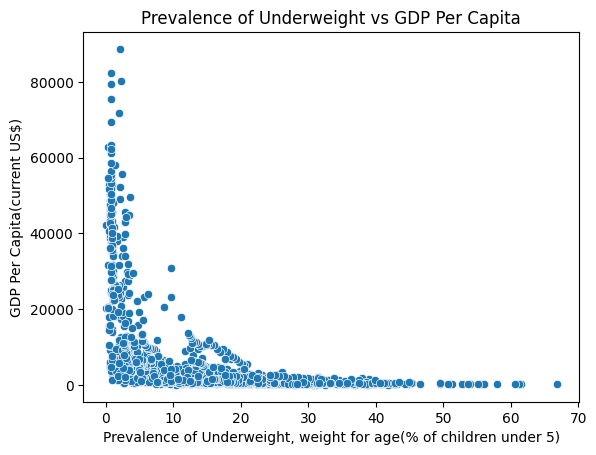

In [ ]:
# Draw a scatter plot for prevalence of underweight against GDP per capital
sns.scatterplot(
    data = combined_df,
    x = 'Underweight Prevalence',
    y = 'GDP'
)
plt.title("Prevalence of Underweight vs GDP Per Capita")
plt.xlabel("Prevalence of Underweight, weight for age(% of children under 5)")
plt.ylabel("GDP Per Capita(current US$)")
plt.show()

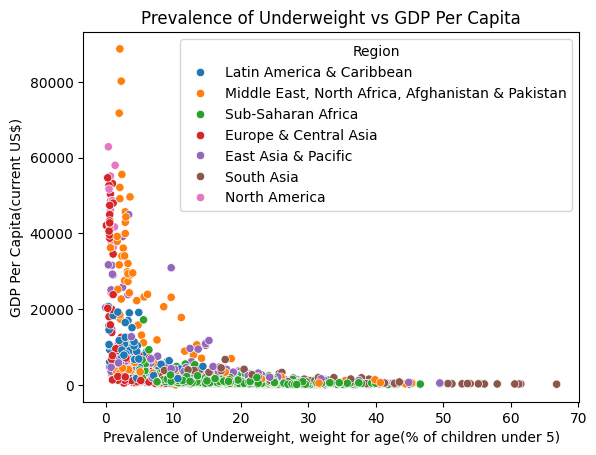

In [ ]:
# Draw a scatter plot for the geographical regions, using a different color for each
sns.scatterplot(
    data=combined_df,
    x='Underweight Prevalence',
    y='GDP',
    hue='Region'
)
plt.xlabel("Prevalence of Underweight, weight for age(% of children under 5)")
plt.ylabel("GDP Per Capita(current US$)")
plt.title('Prevalence of Underweight vs GDP Per Capita')
plt.show()

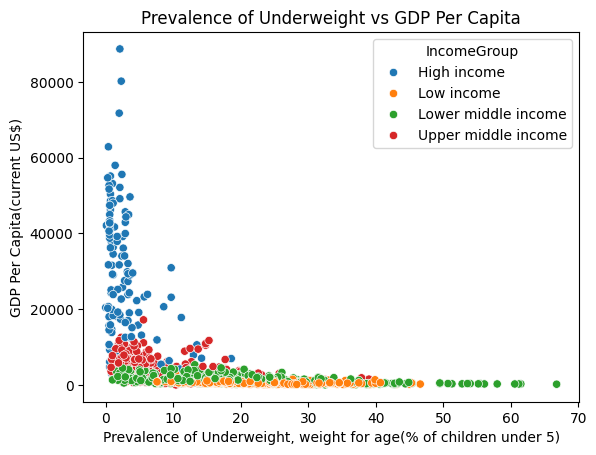

In [ ]:
# Draw a scatter plot for the income levels, using a different color for each
sns.scatterplot(
    data=combined_df,
    x='Underweight Prevalence',
    y='GDP',
    hue='IncomeGroup'
)
plt.xlabel("Prevalence of Underweight, weight for age(% of children under 5)")
plt.ylabel("GDP Per Capita(current US$)")
plt.title('Prevalence of Underweight vs GDP Per Capita')
plt.show()

# Question 4

In [492]:
# Load SPY data
data_spy_df = pd.read_csv("data\\daily_prices\\SPY.csv")
print(data_spy_df.shape)
data_spy_df.head()

(420, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,184.070007,184.690002,183.929993,184.690002,157.853638,86119900
1,2014-01-02,183.979996,184.070007,182.479996,182.919998,156.340836,119636900
2,2014-01-03,183.229996,183.600006,182.630005,182.889999,156.315201,81390600
3,2014-01-06,183.490005,183.559998,182.080002,182.360001,155.862137,108028200
4,2014-01-07,183.089996,183.789993,182.949997,183.479996,156.819412,86144200


In [493]:
# Convert date object to string
data_spy_df['Date'] = pd.to_datetime(data_spy_df['Date'])

In [514]:
data_spy_df.dtypes

Date              datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                     int64
Norm Adj Close           float64
Daily Returns            float64
dtype: object

In [494]:
# Normalize SPY data to start from 100
# Do this by dividing all the values in Adj Close with the first value
# then multiplying the outcome by 100
data_spy_df['Norm Adj Close'] = (data_spy_df['Adj Close'] / data_spy_df['Adj Close'].iloc[0])*100
data_spy_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Norm Adj Close
0,2013-12-31,184.070007,184.690002,183.929993,184.690002,157.853638,86119900,100.000000
1,2014-01-02,183.979996,184.070007,182.479996,182.919998,156.340836,119636900,99.041643
2,2014-01-03,183.229996,183.600006,182.630005,182.889999,156.315201,81390600,99.025403
3,2014-01-06,183.490005,183.559998,182.080002,182.360001,155.862137,108028200,98.738388
4,2014-01-07,183.089996,183.789993,182.949997,183.479996,156.819412,86144200,99.344820


In [495]:
# Load TLT data
data_tlt_df = pd.read_csv("data\\daily_prices\\TLT.csv")
print(data_tlt_df.shape)
data_tlt_df.head()

(420, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,102.290001,102.550003,101.169998,101.860001,83.814583,7218600
1,2014-01-02,101.720001,102.389999,101.690002,102.169998,84.069664,8580800
2,2014-01-03,101.809998,102.449997,101.760002,102.169998,84.069664,4083800
3,2014-01-06,102.379997,103.000000,102.370003,102.599998,84.423508,7796200
4,2014-01-07,102.820000,102.989998,102.559998,102.860001,84.637466,4428100


In [496]:
# Convert date object to string
data_tlt_df['Date'] = pd.to_datetime(data_tlt_df['Date'])

In [497]:
# Normalize TLT data to start from 100
# Do this by dividing all the values in Adj Close with the first value
# then multiplying the outcome by 100
data_tlt_df['Norm Adj Close'] = (data_tlt_df['Adj Close'] / data_tlt_df['Adj Close'].iloc[0])*100
data_tlt_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Norm Adj Close
0,2013-12-31,102.290001,102.550003,101.169998,101.860001,83.814583,7218600,100.000000
1,2014-01-02,101.720001,102.389999,101.690002,102.169998,84.069664,8580800,100.304340
2,2014-01-03,101.809998,102.449997,101.760002,102.169998,84.069664,4083800,100.304340
3,2014-01-06,102.379997,103.000000,102.370003,102.599998,84.423508,7796200,100.726514
4,2014-01-07,102.820000,102.989998,102.559998,102.860001,84.637466,4428100,100.981790


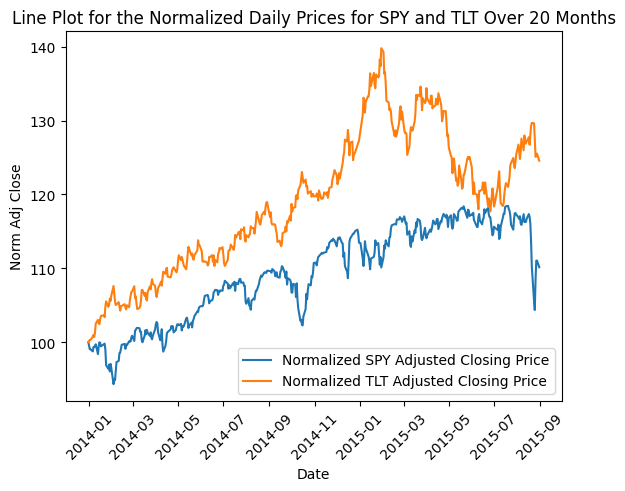

In [498]:
# Plot the two time series for SPY and TLT
sns.lineplot(data=data_spy_df, x=f'Date', y='Norm Adj Close', label='Normalized SPY Adjusted Closing Price')
sns.lineplot(data=data_tlt_df, x='Date', y='Norm Adj Close', label='Normalized TLT Adjusted Closing Price')
plt.xticks(rotation=45)
plt.title("Line Plot for the Normalized Daily Prices for SPY and TLT Over 20 Months")
plt.show()

In [ ]:
# Calculate daily returns for SPY
data_spy_df['Daily Returns'] = data_spy_df['Adj Close'].pct_change()
data_spy_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Norm Adj Close,Daily Returns
0,2013-12-31,184.070007,184.690002,183.929993,184.690002,157.853638,86119900,100.000000,NaN
1,2014-01-02,183.979996,184.070007,182.479996,182.919998,156.340836,119636900,99.041643,-0.009584
2,2014-01-03,183.229996,183.600006,182.630005,182.889999,156.315201,81390600,99.025403,-0.000164
3,2014-01-06,183.490005,183.559998,182.080002,182.360001,155.862137,108028200,98.738388,-0.002898
4,2014-01-07,183.089996,183.789993,182.949997,183.479996,156.819412,86144200,99.344820,0.006142


In [500]:
# Calculate daily returns for TLT
data_tlt_df['Daily Returns'] = data_tlt_df['Adj Close'].pct_change()
data_tlt_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Norm Adj Close,Daily Returns
0,2013-12-31,102.290001,102.550003,101.169998,101.860001,83.814583,7218600,100.000000,NaN
1,2014-01-02,101.720001,102.389999,101.690002,102.169998,84.069664,8580800,100.304340,0.003043
2,2014-01-03,101.809998,102.449997,101.760002,102.169998,84.069664,4083800,100.304340,0.000000
3,2014-01-06,102.379997,103.000000,102.370003,102.599998,84.423508,7796200,100.726514,0.004209
4,2014-01-07,102.820000,102.989998,102.559998,102.860001,84.637466,4428100,100.981790,0.002534


In [519]:
# Calculate the average, min, max daily returns for SPY
min_spy = data_spy_df['Daily Returns'].min()
print(f"Min SPY Daily Return: {(min_spy * 100):.3f}%")
max_spy = data_spy_df['Daily Returns'].max()
print(f"Max SPY Daily Return: {(max_spy * 100):.3f}%")
avg_spy = data_spy_df['Daily Returns'].mean()
print(f"Average SPY Daily Return: {(avg_spy * 100):.3f}%")

Min SPY Daily Return: -4.211%
Max SPY Daily Return: 3.839%
Average SPY Daily Return: 0.026%


In [518]:
# Calculate the average, min, max daily returns for TLT
min_tlt = data_tlt_df['Daily Returns'].min()
print(f"Min TLT Daily Return: {(min_tlt * 100):.3f}%")
max_tlt = data_tlt_df['Daily Returns'].max()
print(f"Max TLT Daily Return: {(max_tlt * 100):.3f}%")
avg_tlt = data_tlt_df['Daily Returns'].mean()
print(f"Average TLT Daily Return: {(avg_tlt * 100):.3f}%")

Min TLT Daily Return: -2.432%
Max TLT Daily Return: 2.647%
Average TLT Daily Return: 0.056%


# Question 5

In [503]:
# Load gdp per capita ppp data
data_gdp_ppp_df = pd.read_csv("data\\gpd_per_capita_ppp\\API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_939864.csv", header=2)
print(data_gdp_ppp_df.shape)
data_gdp_ppp_df.head()

(266, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36117.508211,37524.928478,39287.019517,39110.276190,28976.463550,35696.309372,41649.450792,44967.344513,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3551.146279,3703.977710,3648.261332,3742.921371,3629.566978,3907.249127,4229.086486,4352.490897,4481.246847,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2213.181441,2335.795862,2432.276701,2583.485332,2561.981761,2144.166570,2122.995815,2201.722907,NaN,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4032.306271,4100.154941,4238.954649,4494.591601,4484.064642,4746.752785,5169.145547,5408.013246,5639.830732,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6843.735897,6992.728834,7347.799936,7528.382418,6450.749946,7408.126591,7924.888806,8046.817299,8347.952791,NaN


In [504]:
# Load fertility data
data_fertility_df = pd.read_csv("data\\fertility_rate\\API_SP.DYN.TFRT.IN_DS2_en_csv_v2_939826.csv", header=2)
print(data_fertility_df.shape)
data_fertility_df.head()

(266, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.567000,4.422000,4.262000,4.107000,3.940000,3.797000,...,1.848000,1.785000,1.732000,1.701000,1.662000,1.631000,1.615000,1.602000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.650310,6.667308,6.688246,6.709226,6.724930,6.737459,...,4.615744,4.569884,4.521443,4.471338,4.412973,4.350683,4.287033,4.223771,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.542000,5.433000,5.327000,5.238000,5.145000,5.039000,4.932000,4.840000,NaN,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.468887,6.478351,6.492277,6.500229,6.516739,6.532766,...,5.228976,5.098885,4.962571,4.829134,4.707399,4.637741,4.563354,4.497707,NaN,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,5.124000,NaN,NaN


In [505]:
# Merge data to get 2023 data for gdp and fertility rate
combined_df = pd.merge(
    data_fertility_df[['Country Name', 'Country Code', '2023']],
    data_gdp_ppp_df[['Country Name', 'Country Code', '2023']],
    how='inner',
    on=['Country Name', 'Country Code'],
    suffixes=('_fertility_rate', '_gdp_ppp')
)
print(combined_df.shape)
combined_df.head()

(266, 4)


,Country Name,Country Code,2023_fertility_rate,2023_gdp_ppp
0,Aruba,ABW,1.602000,44967.344513
1,Africa Eastern and Southern,AFE,4.223771,4352.490897
2,Afghanistan,AFG,4.840000,2201.722907
3,Africa Western and Central,AFW,4.497707,5408.013246
4,Angola,AGO,5.124000,8046.817299


In [506]:
# Plot the scatter plot for Fertility Rate against GDP per capita PPP
fig = px.scatter(combined_df, x='2023_fertility_rate', y='2023_gdp_ppp', hover_name='Country Name', 
                 title='Scatter Plot for Fertility Rate vs GDP Per Capital PPP',
                 labels={
                     "2023_fertility_rate": "Fertility Rate, Total(births per woman)",
                     "2023_gdp_ppp": "GDP Per Capital PPP(current international $)"
                 })
fig.show()

In [507]:
# Calculate the correlation coefficient
# This helps us to determine the strength and direction of a relationship between variables
correlation = combined_df['2023_fertility_rate'].corr(combined_df['2023_gdp_ppp'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.6188248795954212


# Question 6

In [508]:
# Load Happy Planet Index Data
data_hpi_df = pd.read_excel("data\\happy_planet_index\\hpi-data-2016.xlsx", sheet_name='Complete HPI data', header=5, usecols=['HPI Rank', 'Country', 'Happy Planet Index'])
print(data_hpi_df.shape)
data_hpi_df.head()

(157, 3)


,HPI Rank,Country,Happy Planet Index
0,110.0,Afghanistan,20.225350
1,13.0,Albania,36.766874
2,30.0,Algeria,33.300543
3,19.0,Argentina,35.190244
4,73.0,Armenia,25.666417


In [509]:
# Load Corruption Perceptions Index Data
data_cpi_df = pd.read_excel("data\\corruption_perceptions_index\\CPI2016_Results.xlsx", sheet_name='CPI2016_FINAL_16Jan', usecols=['Country', 'WB Code', 'CPI2016', 'Rank'])
print(data_cpi_df.shape)
data_cpi_df.head()

(176, 4)


c:\Users\georg\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Conditional Formatting extension is not supported and will be removed



,Country,CPI2016,Rank,WB Code
0,New Zealand,90,1,NZL
1,Denmark,90,1,DNK
2,Finland,89,3,FIN
3,Sweden,88,4,SWE
4,Switzerland,86,5,CHE


In [510]:
# Merge the two datasets on the country name
combined_df = pd.merge(
    data_hpi_df,
    data_cpi_df,
    how='inner',
    on=['Country']
)
print(combined_df.shape)
combined_df.head()

(132, 6)


,HPI Rank,Country,Happy Planet Index,CPI2016,Rank,WB Code
0,110.0,Afghanistan,20.225350,15,169,AFG
1,13.0,Albania,36.766874,39,83,ALB
2,30.0,Algeria,33.300543,34,108,DZA
3,19.0,Argentina,35.190244,36,95,ARG
4,73.0,Armenia,25.666417,33,113,ARM


In [511]:
# Rename Rank to CPI Rank and reorder the columns at the same time
# Just to improve readability
combined_df = combined_df.rename(columns={
    'Happy Planet Index': 'HPI Index',
    'CPI2016': 'CPI Index',
    'Rank': 'CPI Rank'
})
combined_df = combined_df[['Country', 'WB Code', 'HPI Rank', 'HPI Index', 'CPI Rank', 'CPI Index']]
combined_df.head()


,Country,WB Code,HPI Rank,HPI Index,CPI Rank,CPI Index
0,Afghanistan,AFG,110.0,20.225350,169,15
1,Albania,ALB,13.0,36.766874,83,39
2,Algeria,DZA,30.0,33.300543,108,34
3,Argentina,ARG,19.0,35.190244,95,36
4,Armenia,ARM,73.0,25.666417,113,33


In [522]:
# Plot a labelled scatter plot for the HPI Rank against the CPI Rank
fig = px.scatter(combined_df, x='HPI Rank', y='CPI Rank', hover_name='WB Code', 
                 title='Scatter Plot for HPI Rank vs CPI Rank',
                 labels={
                     "CPI Rank": "Corruption Perceptions Index Rank",
                     "HPI Rank": "Happy Planet Index Rank"
                 })
fig.show()

In [513]:
# Calculate the corelation coefficient to be sure of this plot
correlation = combined_df['HPI Rank'].corr(combined_df['CPI Rank'])
print(correlation)

0.1996508441523863
